<a href="https://colab.research.google.com/github/ShreyasJothish/airbnb_pricing_DS/blob/master/notebooks/SJ2_Airbnb_Price_Predictions_Based_on_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Price Predictions based on season.

[Inside AirBnB](http://insideairbnb.com) have curated data that allows us to explore how Airbnb is really being used in cities around the world. For our analysis, we shall be using publicly available information about **Los Angeles, California, United States** Airbnb's listings as of **2019-05-05**.

This specific notebook tries to explore the relationship between AirBnB pricing with respect to seasonality.

**Date Compiled**: 
05 May, 2019

**Country/City**:
Los Angeles

**File Name**:
[calendar.csv.gz](http://data.insideairbnb.com/united-states/ca/los-angeles/2019-05-05/data/calendar.csv.gz)

**Description**:
Detailed Calendar Data for listings in Los Angeles



## Exploratory Data Analysis (EDA)

**Reference**:
https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb




### Generic imports

Importanting most common libraries which shall be used for EDA.

In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# To avoid calling plt.show() each time.
%matplotlib inline

### Data Fetching

Get the **calendar.csv.gz** from Inside AirBnB and extract it.

In [3]:
!wget "http://data.insideairbnb.com/united-states/ca/los-angeles/2019-05-05/data/calendar.csv.gz"
!gunzip calendar.csv.gz

--2019-06-27 03:33:03--  http://data.insideairbnb.com/united-states/ca/los-angeles/2019-05-05/data/calendar.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.216.177.154
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.216.177.154|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47960382 (46M) [application/x-gzip]
Saving to: ‘calendar.csv.gz’

calendar.csv.gz     100%[===================>]  45.74M  33.7MB/s    in 1.4s    

2019-06-27 03:33:05 (33.7 MB/s) - ‘calendar.csv.gz’ saved [47960382/47960382]



### Load Dataset

In [4]:
df_cal = pd.read_csv('calendar.csv')
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,35922,2019-05-05,t,$900.00,$900.00,31.0,1125.0
1,85246,2019-05-05,f,$97.00,$97.00,5.0,190.0
2,85246,2019-05-06,f,$97.00,$97.00,5.0,190.0
3,85246,2019-05-07,f,$97.00,$97.00,5.0,190.0
4,85246,2019-05-08,f,$97.00,$97.00,5.0,190.0


### Data Insights

* Dimension of data.
* Different features available.
* Data types of  features available.
* Check for NaN values.
* Unique listing IDs.

In [5]:
df_cal.shape

(16043437, 7)

In [6]:
df_cal.columns.values

array(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'], dtype=object)

In [7]:
df_cal.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [8]:
df_cal.isnull().sum()

listing_id          0
date                0
available           0
price             365
adjusted_price    365
minimum_nights      6
maximum_nights      6
dtype: int64

In [9]:
df_cal.listing_id.nunique()

43954

#### Key Observations

* Data has few object type values which needs to be converted to numerical values. 
* There  are two fields with respect to pricing (our targe variable).
* There are few features with null/missing values.

### Data Wrangling

Convert object data types to more numerical data types.

* Convert **price** and **adjusted price** feature to float.

> To ensure reduced impact due to outliers, using median value to fill NaN for price and adjusted price. To calculate the median value initially by setting NaN to 0 and based on resulting median both price and adjusted price NaN values are initialized to 115.0.

```python
df_cal.price.fillna(value='$'+str(0.0), inplace=True)
df_cal.price = df_cal.price.apply(lambda x: float(str(x)[1:].replace(',','')))

df_cal.price.median()
```

* Convert **available** feature to int.

* Fill NaN values in **minimum_nights** and **maximum_nights** with forward fill.

> This is not important since the number of missing values are less. So either drop records or retain it with fillna.

* Extract season related information from **date** feature.

> This is done by extracting Month, Day of the Month and Day of the Week information.

In [0]:
# Convert price to float
df_cal.price.fillna(value='$'+str(115.0), inplace=True)
df_cal.price = df_cal.price.apply(lambda x: float(str(x)[1:].replace(',','')))

df_cal.adjusted_price.fillna(value='$'+str(115.0), inplace=True)
df_cal.adjusted_price = \
    df_cal.adjusted_price.apply(lambda x: float(str(x)[1:].replace(',','')))

# Update to numerical form
df_cal['available'] = \
   df_cal['available'].apply(lambda x: 1 if x == 't' else 0)

# Handle NaN values
df_cal.minimum_nights.fillna(method='ffill', inplace=True)
df_cal.maximum_nights.fillna(method='ffill', inplace=True)

# Add data and season related information
df_cal['date'] = pd.to_datetime(df_cal['date'])
df_cal['month'] = df_cal['date'].dt.month
df_cal['day_of_month'] = df_cal['date'].dt.day
df_cal['day_of_week'] = df_cal['date'].dt.weekday

### Summary Statistics

In [11]:
df_cal.describe()

,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights,month,day_of_month,day_of_week
count,1.604344e+07,1.604344e+07,1.604344e+07,1.604344e+07,1.604344e+07,1.604344e+07,1.604344e+07,1.604344e+07,1.604344e+07
mean,2.006356e+07,4.435412e-01,2.109703e+02,2.108694e+02,5.731630e+00,6.640367e+02,6.517787e+00,1.578745e+01,2.999604e+00
std,9.871730e+06,4.968022e-01,5.117769e+02,5.117214e+02,2.292801e+01,4.853246e+03,3.455028e+00,8.803930e+00,2.003439e+00
min,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.295381e+07,0.000000e+00,7.300000e+01,7.300000e+01,1.000000e+00,3.000000e+01,4.000000e+00,8.000000e+00,1.000000e+00
50%,2.137141e+07,0.000000e+00,1.150000e+02,1.150000e+02,2.000000e+00,1.125000e+03,7.000000e+00,1.600000e+01,3.000000e+00
75%,2.867831e+07,1.000000e+00,1.950000e+02,1.950000e+02,3.000000e+00,1.125000e+03,1.000000e+01,2.300000e+01,5.000000e+00
max,3.442641e+07,1.000000e+00,2.500000e+04,2.500000e+04,3.000000e+03,1.000000e+06,1.200000e+01,3.100000e+01,6.000000e+00


In [12]:
# Check for NaN values
df_cal.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
month             0
day_of_month      0
day_of_week       0
dtype: int64

### Check correlation

It is important to check correlation of features with target and between themselves for better modeling.

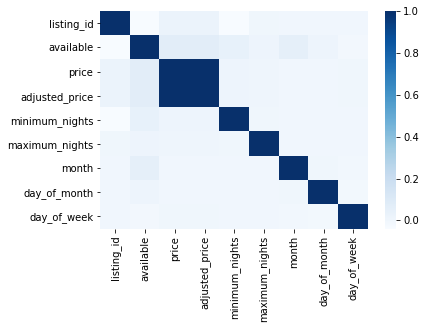

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cal.corr(),cmap='Blues',annot=False);

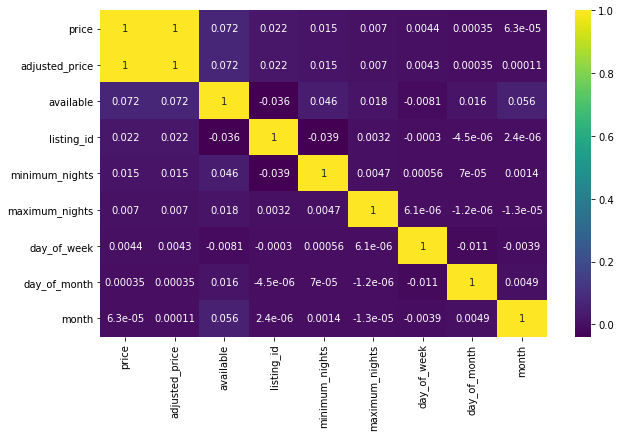

In [14]:
#Price correlation matrix
k = 10 #number of variables for heatmap
cols = df_cal.corr().nlargest(k, 'price')['price'].index
cm = df_cal[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis');

In [15]:
df_cal_price_diff = df_cal[df_cal["adjusted_price"] != df_cal["price"]]
df_cal_price_diff.listing_id.nunique()

996

In [16]:
df_cal.listing_id.nunique()

43954

#### Key Observations

* **adjusted_price** feature and **price** feature are highly correlated. So we can choose either one.

* **listing_id** feature is unique identifier of the listings. So shall not be included in modeling.

* **date** feature has been feature engineered to fetch needed information. So can be dropped too.

In [0]:
columns = ['adjusted_price', 'listing_id', 'date']
df_cal.drop(columns=columns, inplace=True)

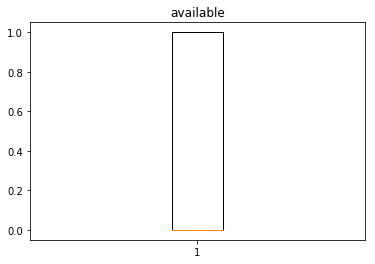

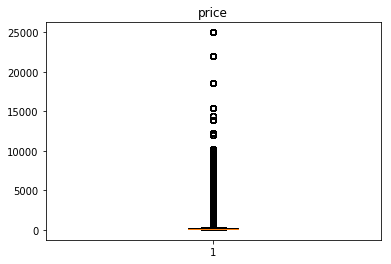

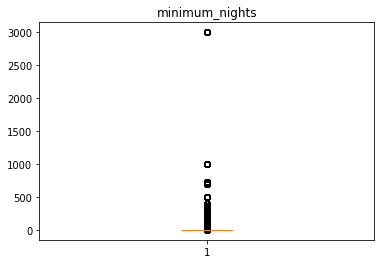

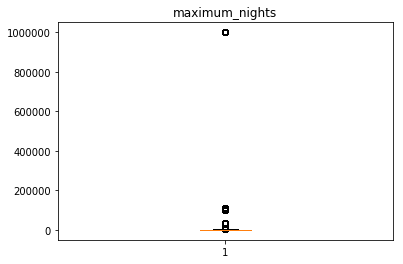

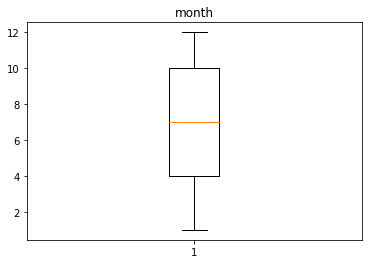

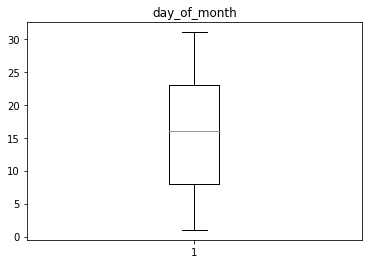

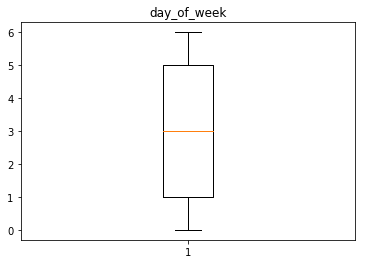

In [18]:
# red_square = dict(markerfacecolor='r', marker='s')
columns = df_cal.columns.values

for column in columns:
  fig, ax = plt.subplots()
  ax.set_title(column)
  ax.boxplot(df_cal[column])

### Check Target

In [19]:
df_cal.price.nunique()

4496

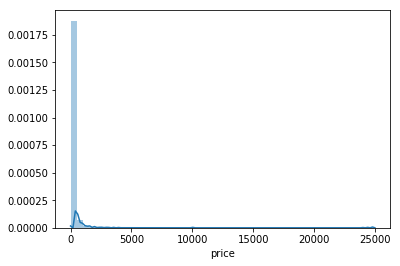

In [20]:
sns.distplot(df_cal['price'],kde=True);

In [21]:
columns = ['month','day_of_week','day_of_week']

for column in columns:
  print(df_cal.groupby([column])['price'].mean())

month
1     212.542453
2     212.925850
3     213.169289
4     212.802370
5     200.769774
6     209.438184
7     213.753582
8     212.652466
9     206.047727
10    210.659751
11    212.407607
12    214.170340
Name: price, dtype: float64
day_of_week
0    208.074802
1    207.857334
2    208.145134
3    208.927051
4    217.212912
5    217.686761
6    208.935991
Name: price, dtype: float64
day_of_week
0    208.074802
1    207.857334
2    208.145134
3    208.927051
4    217.212912
5    217.686761
6    208.935991
Name: price, dtype: float64


#### Key Observations

* Target data i.e. **price** appears to be having many outliers and skewed to right. So log normalization is needed.

> Note:  One particular listing has price set to 0. This is making log transformation fail with error "RuntimeWarning: divide by zero encountered in log". So dropping such entries.

* Drop the original **price** column.

In [0]:
df_cal = df_cal[df_cal['price'] > 0]
df_cal['logprice'] = np.log(df_cal['price'])

df_cal.drop(columns=['price'], inplace=True)

## Data Modelling

We shall now work with different Machine Learning models and check for feature importance.

Here we are dealing with regression problem so to start with we can use Linear models like Linear Regression and Ridge Regression (since there are many outliers).

Followed by Tree ensembles (Random Forest Regressor) and boosting models (XGB Regressor).

For metrics we shall use R^2 (coefficient of determination) regression score function.

### Model Preprocessing

Split data into features and target.

In [0]:
X = df_cal.drop(columns=['logprice'])
y = df_cal['logprice']

Split data into train and test using k-fold cross-validation with independent test data set.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=42
                                                   )

### Linear Regression

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error

In [0]:
from sklearn.linear_model import LinearRegression

pipeline = make_pipeline(RobustScaler(),
                         LinearRegression())

In [29]:
param_grid = {
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=3, 
                         scoring='r2', verbose=20)

gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.012, total=   5.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] .................................... , score=0.013, total=   4.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


[CV] .................................... , score=0.013, total=   4.9s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
    

In [30]:
# Best cross validation score
print('Cross Validation Score:', gridsearch.best_score_)

Cross Validation Score: 0.012530784982855092


In [31]:
#Get the best model and check it against test data set.

# Predict with X_test features
y_pred = gridsearch.predict(X_test)

# Compare predictions to y_test labels
test_score = r2_score(y_test, y_pred)
print('R^2 Score on test data set:', test_score)

R^2 Score on test data set: 0.012509629420891732


In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Slope Coefficient: ", model.coef_)
print("\nIntercept Value: ", model.intercept_)

beta_0 = model.intercept_
beta_i = model.coef_

Slope Coefficient:  [ 1.85771587e-01  6.32397816e-04  1.98090817e-06 -2.19295486e-03
 -1.15851335e-04  5.15120017e-03]

Intercept Value:  4.742546145039939


In [36]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(MSE))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 0.713483669395738
RMSE is 0.8446796252992835
R^2 is 0.012509629420891732


### Ridge Regression

### Random Forest

### Boosting Algorithm